# SMS Spam Collection Data Set 

Reference: https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from beautifultable import BeautifulTable

In [2]:
df=pd.read_csv('SMSSpamCollection',dtype=str, sep="\t", header=None)

df.columns = ['MsgType', 'msgContent']
print df.head()
print df.groupby('MsgType').describe()

  MsgType                                         msgContent
0     ham  Go until jurong point, crazy.. Available only ...
1     ham                      Ok lar... Joking wif u oni...
2    spam  Free entry in 2 a wkly comp to win FA Cup fina...
3     ham  U dun say so early hor... U c already then say...
4     ham  Nah I don't think he goes to usf, he lives aro...
        msgContent                                                            \
             count unique                                                top   
MsgType                                                                        
ham           4825   4516                             Sorry, I'll call later   
spam           747    653  Please call our customer service representativ...   

              
        freq  
MsgType       
ham       30  
spam       4  


In [3]:
df.MsgType.describe()

count     5572
unique       2
top        ham
freq      4825
Name: MsgType, dtype: object

In [4]:
words = []
MsgType   = []
MsgLenght = []
CountChar = []    # count number of characters in each sms
CountInt  = []    # count number of integers in each sms
CountWord = []
CountUpperCase = []
CountLowerCase = []

# To get all special characters use below commented lines
#from string import punctuation
#specialChar = set(punctuation)
#print specialChar
#print len(specialChar)
           
for i,f in enumerate(df.itertuples()):
    MsgType.append(f[1])
    MsgLenght.append(len(f[2]))
    CountChar.append(sum(c.isalpha() for c in f[2]))
    CountInt.append(sum(c.isdigit() for c in f[2]))
    CountUpperCase.append(sum(c.isupper() for c in f[2]))
    CountLowerCase.append(sum(c.islower() for c in f[2]))
    CountWord.append(len(f[2].split()))
    #isascii = lambda f[2]: len(f[2]) == len(f[2].encode())
    #print isascii
    for word in f[2].split():
        words.append(''.join(e for e in word if e.isalnum()))
        #print words
print "Message Tyep    = ",MsgType[:10]
print "Message Length  = ",MsgLenght[:10]        
print "Character Count = ",CountChar[:10]        
print "Digit Count     = ",CountInt[:10]
print "Word Count      = ",CountWord[:10]
print "Upper Case Count= ",CountUpperCase[:10]
print "Lower Case Count= ",CountLowerCase[:10]

Message Tyep    =  ['ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam']
Message Length  =  [111, 29, 155, 49, 61, 148, 77, 160, 158, 154]
Character Count =  [83, 18, 97, 33, 47, 103, 60, 128, 106, 111]
Digit Count     =  [0, 0, 25, 0, 0, 4, 0, 1, 19, 13]
Word Count      =  [20, 6, 28, 11, 13, 32, 16, 26, 26, 29]
Upper Case Count=  [3, 2, 10, 2, 2, 7, 2, 10, 12, 14]
Lower Case Count=  [80, 16, 87, 31, 45, 96, 58, 118, 94, 97]


In [5]:
MsgType   = np.array(MsgType)
MsgLenght = np.array(MsgLenght)
CountChar = np.array(CountChar)
CountInt  = np.array(CountInt)
CountWord = np.array(CountWord)
CountUpperCase = np.array(CountUpperCase)
CountLowerCase = np.array(CountLowerCase)

data = np.concatenate(([[MsgLenght],[CountChar],[CountInt],[CountWord],[CountUpperCase],[CountLowerCase]]),axis=0)
targetdataName = np.concatenate(([[MsgType]]),axis=0)


In [6]:
#print data.shape
#print data
#print data.transpose()

In [7]:
InData   = data.transpose()
InTargetName = targetdataName
MsgType = [s.replace('ham' , '0') for s in MsgType]
MsgType = [s.replace('spam' , '1') for s in MsgType]
InTarget = np.concatenate(([MsgType]),axis=0)
#print InTarget
InTarget = InTarget.transpose()
#print InTarget1
#print InData

In [8]:
print type(InData), type(InTarget)

<type 'numpy.ndarray'> <type 'numpy.ndarray'>


In [9]:
#InTarget = InTarget.transpose()
print InTarget
print InData.shape
print InTarget.shape

['0' '0' '1' ..., '0' '0' '0']
(5572, 6)
(5572,)


In [10]:
X = InData

y = InTarget

df2 = pd.DataFrame(y)
df2.columns = ["Type"]
print(df2.head())

df3 = pd.DataFrame(InTargetName.transpose())
df3.columns = ["Type"]
print(df3.head())

df = pd.DataFrame(X)
df.columns = ["length","nChar","nInt","nWord","nUpper","nLower"]
print(df.head())

  Type
0    0
1    0
2    1
3    0
4    0
   Type
0   ham
1   ham
2  spam
3   ham
4   ham
   length  nChar  nInt  nWord  nUpper  nLower
0     111     83     0     20       3      80
1      29     18     0      6       2      16
2     155     97    25     28      10      87
3      49     33     0     11       2      31
4      61     47     0     13       2      45


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [12]:
knn.fit(InData, InTarget)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [13]:
print(df.describe())

            length        nChar         nInt        nWord       nUpper  \
count  5572.000000  5572.000000  5572.000000  5572.000000  5572.000000   
mean     80.616296    59.104451     2.384243    15.597452     5.623654   
std      60.015593    43.684997     6.253175    11.404053    11.715023   
min       2.000000     0.000000     0.000000     1.000000     0.000000   
25%      36.000000    27.000000     0.000000     7.000000     1.000000   
50%      62.000000    46.000000     0.000000    12.000000     2.000000   
75%     122.000000    88.000000     1.000000    23.000000     4.000000   
max     910.000000   718.000000    47.000000   171.000000   138.000000   

            nLower  
count  5572.000000  
mean     53.480797  
std      40.929957  
min       0.000000  
25%      24.000000  
50%      42.000000  
75%      77.000000  
max     706.000000  


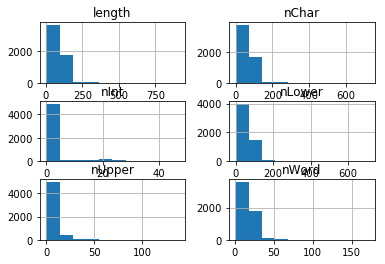

In [14]:
df.hist()
plt.show()

/home/archana/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  


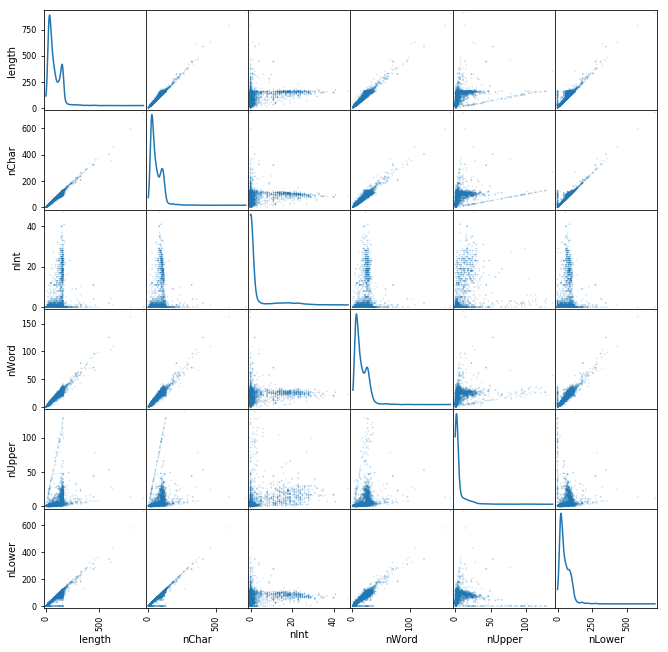

In [15]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(11, 11), diagonal='kde', s=10, marker   = ".")
plt.show()
plt.savefig("scatter_matrix.jpg")

In [16]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
# Split-out validation dataset
array = df.values
X = array[:,0:5]
Y = array[:,5]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [18]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [19]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.059902 (0.009606)


/home/archana/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/home/archana/anaconda2/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


LDA: 0.089294 (0.008030)
KNN: 0.456142 (0.030996)
CART: 0.779448 (0.023139)
NB: 0.235356 (0.016562)
SVM: 0.567648 (0.029174)


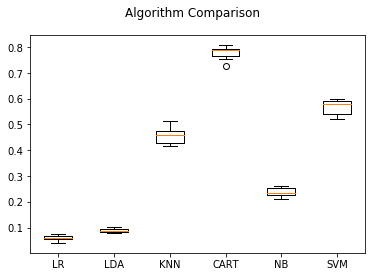

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [21]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.463677130045
[[16  0  0 ...,  0  0  0]
 [ 1  4  0 ...,  0  0  0]
 [ 0  2  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
             precision    recall  f1-score   support

          0       0.84      1.00      0.91        16
          1       0.67      0.80      0.73         5
          2       0.00      0.00      0.00         2
          3       0.50      0.50      0.50         2
          4       0.50      0.67      0.57         3
          5       0.00      0.00      0.00         3
          6       0.67      1.00      0.80         2
          7       0.50      0.50      0.50         2
          8       0.00      0.00      0.00         1
          9       0.00      0.00      0.00         3
         10       0.50      1.00      0.67         2
         11       0.00      0.00      0.00         1
         12       1.00      0.75      0.86         4
         13       0.29      0.40      0.33         5
         14       0.75   

/home/archana/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/archana/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
